In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [147]:

class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.EU=np.zeros_like(self.VEK)
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
       # self.r += self.dt*self.v
       # self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial
            
    def Potential
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    # Debes agregar las paredes en este punto

SyntaxError: invalid syntax (Temp/ipykernel_5700/3491073415.py, line 69)

In [148]:
def GetParticles(N,t):
    
    
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    Particles = []
    
    r_= np.random.uniform(-20.,20.,[N,2])
    v_=np.random.uniform(-5.,5.,[N,2])
    a_=np.zeros_like(v_)
    
    print(r_)
    
    for i in range(N):
      
      Particles.append(Particle(r_[i],v_[i],a_[i],t,m=1,radius=2,Id=i))
        
    
    return Particles

In [149]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)

[[ 16.94437116  -1.63469044]
 [  5.9190354   17.38973911]
 [-10.56344318  -5.54511659]
 [ -8.64313425   7.61493555]
 [  2.05714483 -14.64081045]
 [-16.80859698  -2.00296017]
 [-12.75523818 -10.47503144]
 [-12.64122142  12.44539524]
 [ 14.92998586 -11.78855891]
 [-10.41651646   5.32918674]]


In [150]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [165]:
Particles = GetParticles(10,t)
Particles = RunSimulation(t,Particles)


[[  0.97578068  15.92833147]
 [  7.14298484  14.58135207]
 [-16.46212787  11.38903025]
 [-11.99719791 -12.69713126]
 [ 12.77041629 -19.42827413]
 [-10.4012449  -14.73001688]
 [ 12.52711706  17.84565451]
 [  1.50070623 -12.54512093]
 [ -2.41819425   2.72958995]
 [ -0.99057456  19.31082152]]


Running simulation: 100%|███████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 478.62 Steps/s]


In [152]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


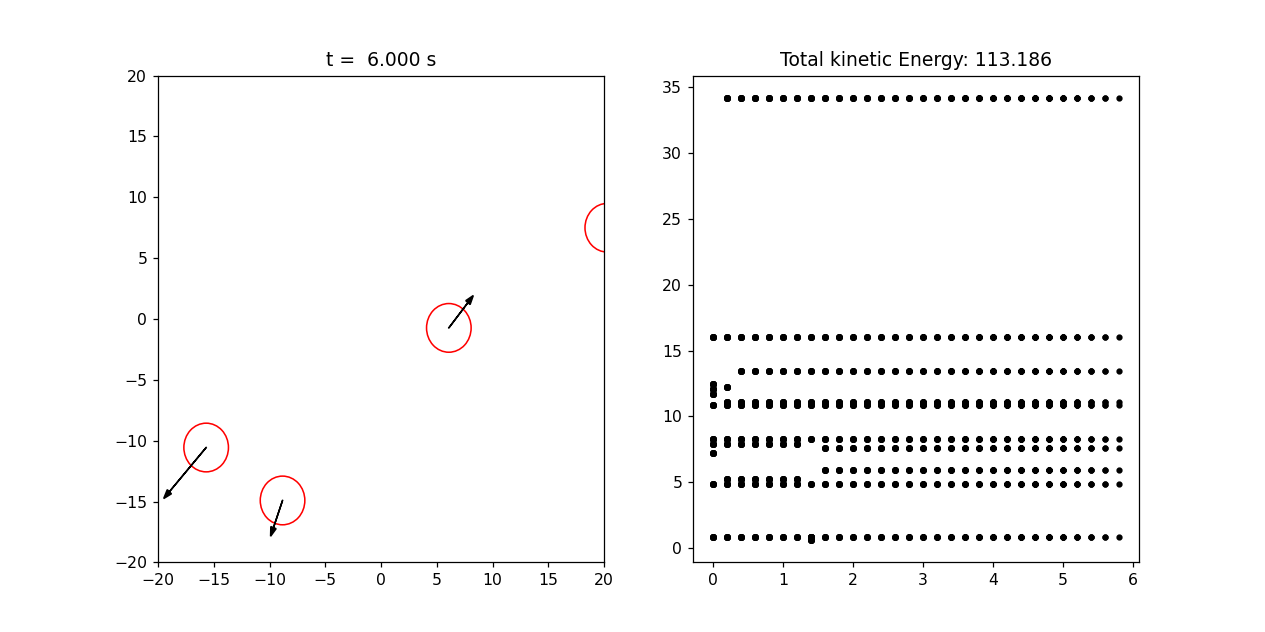

In [171]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [167]:
MomentumT = Particles[0].GetMomentum(scale)
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))


<IPython.core.display.Javascript object>


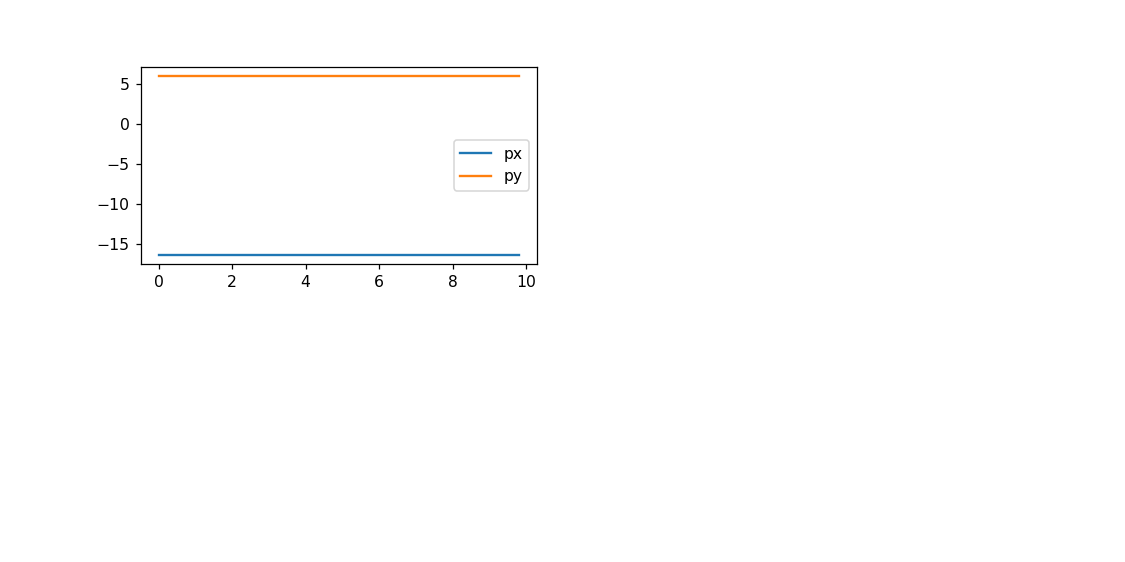

In [168]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()

In [169]:
KineticT = Particles[0].GetKineticEnergy(scale)
for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))


<IPython.core.display.Javascript object>


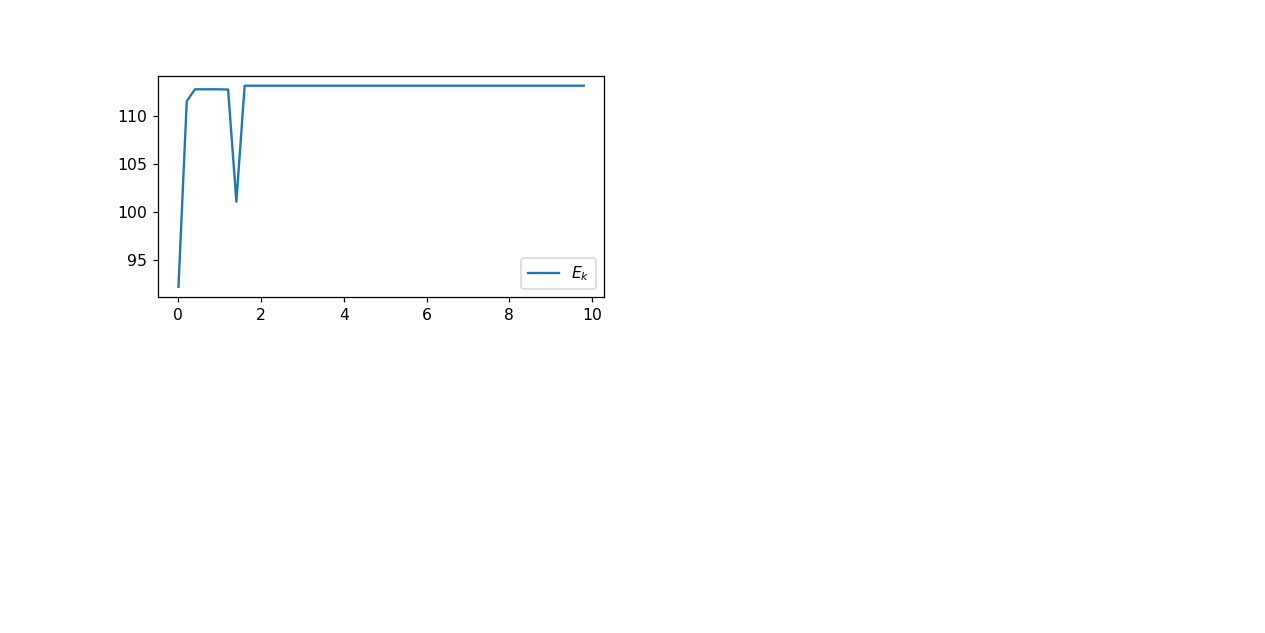

In [170]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(221)
ax4.plot(t1,KineticT,label='$E_k$')
ax4.legend()